#Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetable_Recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


#Loading Model

In [4]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/Fruits_Vegetable_Recognition/trained_model.h5')

#Visualising and Performing Prediction on Single image

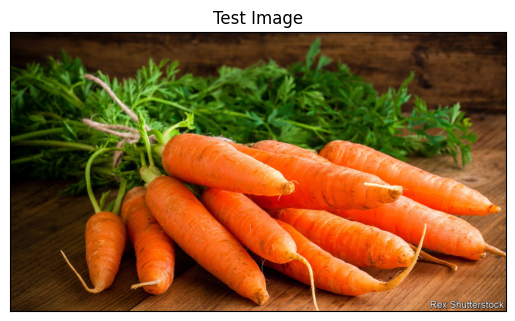

In [5]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/Fruits_Vegetable_Recognition/test/carrot/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


In [7]:
print(predictions)

[[1.02165687e-09 6.87156154e-09 4.81446064e-11 7.62506680e-09
  9.81149295e-09 4.30227098e-09 9.99993443e-01 1.96690650e-10
  1.46267229e-08 6.22111251e-11 6.97282024e-11 8.97323665e-13
  1.08005332e-11 5.66709479e-09 5.08315438e-11 6.80813479e-12
  2.94653676e-11 1.75866077e-09 6.75834333e-10 1.18643975e-07
  2.61913158e-10 3.36667849e-09 7.04826864e-09 9.25560784e-09
  1.84401619e-10 1.58498295e-07 8.00325639e-11 9.99748617e-10
  4.31673763e-09 4.65891214e-10 2.26497959e-10 6.05881178e-06
  1.13443662e-07 3.24098370e-09 1.35252833e-07 3.24465593e-10]]


In [8]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

6


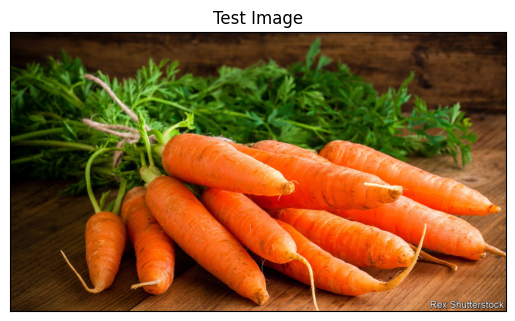

In [10]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a carrot


In [12]:
file = open("/content/drive/MyDrive/Fruits_Vegetable_Recognition/labels.txt","w")
for i in test_set.class_names:
  file.write(i+"\n")
file.close()